In [1]:
from data_storage import create_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from stockstats import StockDataFrame
#from pandas_profiling import ProfileReport

In [2]:
connection = create_connection("../database/crypto_billionairs.db")

In [3]:
df = pd.read_csv('../database/BTC_1min.txt', sep=",")
df.columns = ["time", "open", "high", "low", "close", "volume"]

In [4]:
df.head()

,time,open,high,low,close,volume
0,2013-04-01 01:15:00,93.70000,93.70000,93.70000,93.70000,24.720500
1,2013-04-01 01:16:00,93.70000,93.70000,93.70000,93.70000,12.250000
2,2013-04-01 01:23:00,93.76500,93.78661,93.76500,93.78661,1.490934
3,2013-04-01 01:24:00,93.78900,93.79000,93.78900,93.79000,15.659066
4,2013-04-01 02:23:00,94.06751,94.06751,94.06751,94.06751,24.500000


In [5]:
df["return"] = df['close'].pct_change() + 1 

In [6]:
#prof = ProfileReport(df)
#prof.to_file(output_file='data_profile.html')

No handles with labels found to put in legend.


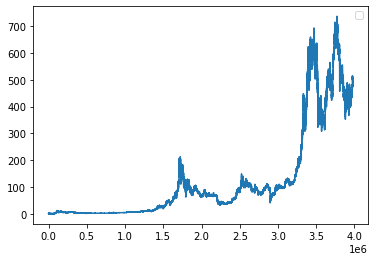

In [7]:
# Plot indexed returns.
plt.plot(np.cumprod(df["return"]))
plt.legend()
plt.show()

In [8]:
df.head()

,time,open,high,low,close,volume,return
0,2013-04-01 01:15:00,93.70000,93.70000,93.70000,93.70000,24.720500,NaN
1,2013-04-01 01:16:00,93.70000,93.70000,93.70000,93.70000,12.250000,1.000000
2,2013-04-01 01:23:00,93.76500,93.78661,93.76500,93.78661,1.490934,1.000924
3,2013-04-01 01:24:00,93.78900,93.79000,93.78900,93.79000,15.659066,1.000036
4,2013-04-01 02:23:00,94.06751,94.06751,94.06751,94.06751,24.500000,1.002959


In [9]:
df_ti = pd.DataFrame()
df_ti["open_time"] = df["time"]
df_ti["open"] = df["open"]
df_ti["close"] = df["close"]
df_ti["high"] = df["high"]
df_ti["low"] = df["low"]
df_ti["volume"] = df["volume"]

In [10]:
stock = StockDataFrame.retype(df_ti)

In [11]:
df["stochastic_oscillator"] = stock.get("kdjk")
df["relative_strength_index"] = stock.get("rsi_30")

### Different momentum analysis

In [12]:
def momentum(df, lag):
    return df.pct_change(periods=lag)

In [25]:
df = pd.read_csv('../database/BTC_1min.txt', sep=",")
connection = create_connection("../database/crypto_billionairs.db")
df.columns = ["time", "open", "high", "low", "close", "volume"]
df["momentum_1day"] = momentum(df["close"], 10080)
    
df["buy_indicator"] = 0
df.loc[df["momentum_1day"] > 0.025, 'buy_indicator'] = 1
df.loc[df["momentum_1day"] < -0.08, 'short_indicator'] = -1
    
df.to_sql("BTCUSDT_1m_complete_history_long_short", connection, if_exists="replace")

# 20160, 0.06 and -0.12

#10080, 0.03, -0.08 (-0.06)

In [14]:
# 1 Hour Momentum
df["momentum1"] = momentum(df["close"], 12)
# 2 Hour Momentum
df["momentum2"] = momentum(df["close"], 24)
# 4 Hour Momentum
df["momentum4"] = momentum(df["close"], 48)
# 8 Hour Momentum
df["momentum8"] = momentum(df["close"], 96)
# 12 Hour Momentum
df["momentum12"] = momentum(df["close"], 144)
# 1 Day Momentum
df["momentum24"] = momentum(df["close"], 288)
# 2 Day Momentum
df["momentum48"] = momentum(df["close"], 576)
# 4 Day Momentum
df["momentum96"] = momentum(df["close"], 1152)
# 1 Week Momentum
df["momentum168"] = momentum(df["close"], 2016)

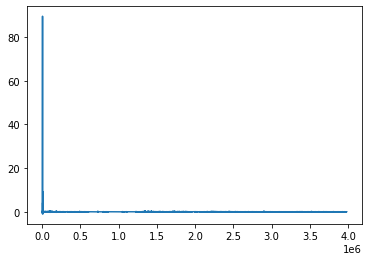

In [15]:
plt.plot(df["momentum1"])
plt.show()

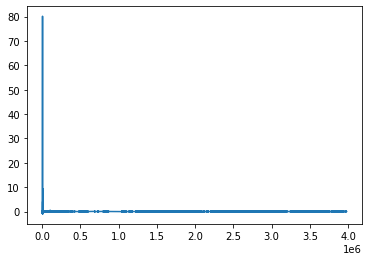

In [16]:
plt.plot(df["momentum2"])
plt.show()

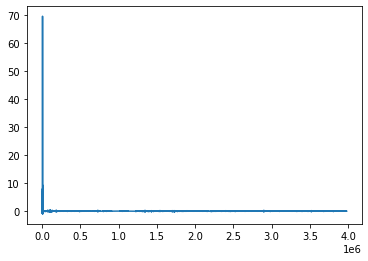

In [17]:
plt.plot(df["momentum4"])
plt.show()

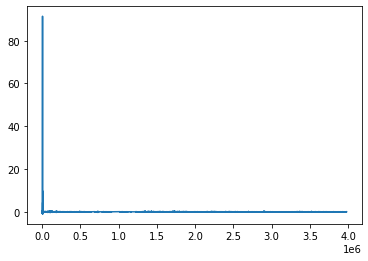

In [18]:
plt.plot(df["momentum8"])
plt.show()

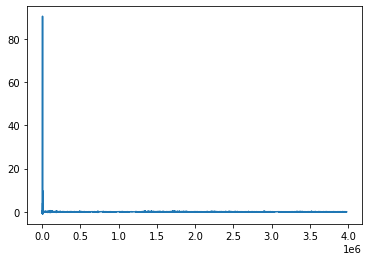

In [19]:
plt.plot(df["momentum12"])
plt.show()

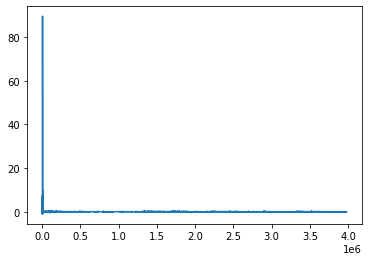

In [20]:
plt.plot(df["momentum24"])
plt.show()

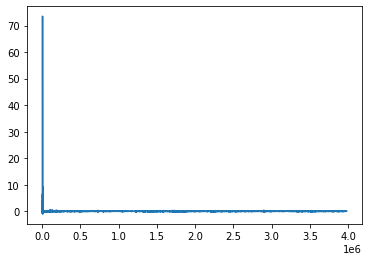

In [21]:
plt.plot(df["momentum48"])
plt.show()

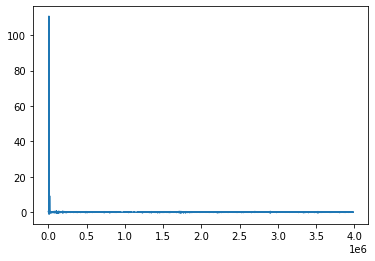

In [22]:
plt.plot(df["momentum96"])
plt.show()

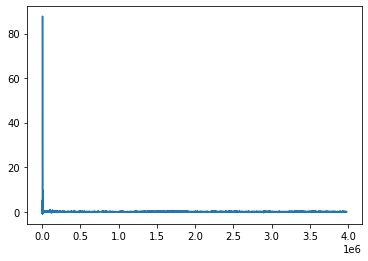

In [23]:
plt.plot(df["momentum168"])
plt.show()

### Stochastic Oscialltor and Relative Strength Index as baseline

#### Generating Buying Signals

In [24]:
df["so_group"] = df["stochastic_oscillator"].astype(str).str[0]
df["rsi_group"] = df["relative_strength_index"].astype(str).str[0]

KeyError: 'stochastic_oscillator'

In [ ]:
pd.crosstab(df["so_group"], df["rsi_group"])

rsi_group,0,1,2,3,4,5,6,7,8,9,n
so_group,,,,,,,,,,,
0,3,116,412,1045,2943,964,51,10,2,2,0
1,9,919,8449,48065,156388,44538,1405,78,20,26,0
2,2,429,4775,42317,181659,79694,3348,127,19,12,1
3,0,299,2617,28422,170479,107176,6683,278,23,11,1
4,0,231,1708,18404,150847,126435,10769,525,65,5,0
5,0,219,1268,13099,135391,148506,16341,845,84,10,0
6,0,167,1192,9509,118425,181017,25716,1672,112,13,0
7,0,147,973,6422,90976,212248,40833,4009,235,17,0
8,0,125,892,4670,59409,206391,54186,9130,776,40,0


In [ ]:
df["technical_indicators"] = df["so_group"] + "/" + df["rsi_group"]

In [ ]:
df_momentum168 = pd.DataFrame()
df_momentum168["technical_indicators"] = df["technical_indicators"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_momentum168.groupby("technical_indicators").median().where(df_momentum168.groupby("technical_indicators").median() >= 0.1))

,momentum168
technical_indicators,
0/0,NaN
0/1,NaN
0/2,NaN
0/3,NaN
0/4,NaN
0/5,NaN
0/6,NaN
0/7,NaN
0/8,NaN


### RSI Only Analysis

In [ ]:
df_momentum168 = pd.DataFrame()
df_momentum168["rsi_group"] = df["rsi_group"].shift(5760)
df_momentum168["momentum168"] = df["momentum168"]
df_momentum168.groupby("rsi_group").mean()

,momentum168
rsi_group,
0,-0.009293
1,-0.009981
2,-0.000632
3,0.005292
4,0.006683
5,0.007180
6,0.006875
7,0.003920
8,0.012295


### Backtesting (Long-Only) - Calculate the returns by applying basic rules

In [ ]:
#lets build an example of 1 week momentum and see when our indicators appear
df["buy_indicator"] = 0
df.loc[df["technical_indicators"] == "1/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "2/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "3/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "4/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "5/7", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "6/1", 'buy_indicator'] = 1
df.loc[df["technical_indicators"] == "8/1", 'buy_indicator'] = 1

In [ ]:
df["close_indicator"] = 0
df.loc[df["technical_indicators"].shift(2880) == "1/1", 'close_indicator'] = 1
df.loc[df["technical_indicators"].shift(2880) == "2/1", 'close_indicator'] = 1
df.loc[df["technical_indicators"].shift(2880) == "3/1", 'close_indicator'] = 1
df.loc[df["technical_indicators"].shift(2880) == "4/1", 'close_indicator'] = 1
df.loc[df["technical_indicators"].shift(2880) == "5/7", 'close_indicator'] = 1
df.loc[df["technical_indicators"].shift(2880) == "6/1", 'close_indicator'] = 1
df.loc[df["technical_indicators"].shift(2880) == "8/1", 'close_indicator'] = 1


In [ ]:
df["buy_indicator"] = 0
df.loc[df["relative_strength_index"] < 20, 'buy_indicator'] = 1

In [ ]:
df["close_indicator"] = 0
df.loc[df["relative_strength_index"].shift(2016) < 20, 'close_indicator'] = 1

In [ ]:
buy_colors = []
for value in df["buy_indicator"]:
    if value == 1:
        buy_colors.append("r")
    else:
        buy_colors.append("None")

In [ ]:
sell_colors = []
for value in df["close_indicator"]:
    if value == 1:
        sell_colors.append("g")
    else:
        sell_colors.append("None")

In [ ]:
# plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
# plt.show()
# plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
# plt.show()
# plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
# plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
# plt.plot(np.cumprod(df["return"]))
# plt.show()

In [ ]:
def calculate_cumulated_return(df, start_sum):

    money = start_sum
    money_history = []
    sell_index = 0

    for index, row in df[['close', 'buy_indicator', 'close_indicator']].iterrows():
        

        if row["buy_indicator"] == 1 and money != 0 and index > sell_index:
            assets = money / row["close"]
            money = 0
            buy_index = index
            sell_index = buy_index + 2015

        if sell_index == index and money == 0: 
            money = assets * df["close"][sell_index]
            money_history.append(money / start_sum)
            assets = 0

        
        if len(df) - 1 == index and assets != 0:
            money = assets * row["close"]
            money_history.append(money / start_sum)
            assets = 0

    return money / start_sum, money_history

#result, hist = calculate_cumulated_return(df, 1000000)

In [ ]:
print(max(hist))

NameError: name 'hist' is not defined

In [ ]:
print(result)

63.34241990684177


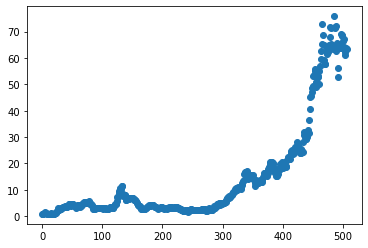

In [ ]:
plt.scatter(list(range(len(hist))), hist)
plt.show()

In [ ]:
df.to_sql("ETHUSDT_1m_complete_history_long", connection, if_exists="replace")